## GENES // NEUROSYNTH

In [1]:
import nibabel as nib
from neuromaps import datasets
from neuromaps import nulls
from neuromaps import stats
from neuromaps import transforms
import pandas as pd
from neuromaps.stats import compare_images

In [239]:
# LOAD FILES

# terms
ad_unthresholded = nib.load('data/neurosynth_maps/terms/neurosynth_ad.nii')
AD_association = nib.load('data/neurosynth_maps/terms/alzheimer_association-test_z_FDR_0.01.nii')
age = nib.load('data/neurosynth_maps/terms/age_uniformity-test_z_FDR_0.01.nii')
memory = nib.load('data/neurosynth_maps/terms/memory_association-test_z_FDR_0.01.nii')
hip = nib.load('data/neurosynth_maps/terms/hippocampus_association-test_z_FDR_0.01.nii')

# topics
topic377 = nib.load('data/neurosynth_maps/topics/v4-topics-400_377_ad_disease_mci_association-test_z_FDR_0.01.nii')

genes = {
    'ELMO2': nib.load('data/neurosynth_maps/genes1/gene_40559_ELMO2_63916.0.nii'),
    'GADD45B': nib.load('data/neurosynth_maps/genes1/gene_4590_GADD45B_4616.0.nii'),
    'LANCL2': nib.load('data/neurosynth_maps/genes1/gene_35202_LANCL2_55915.0.nii'),
    'RSPO3': nib.load('data/neurosynth_maps/genes1/gene_59060_RSPO3_84870.0.nii'),
    'TRIM66': nib.load('data/neurosynth_maps/genes1/gene_9722_TRIM66_9866.0.nii'),
    'DCAF5': nib.load('data/neurosynth_maps/genes1/gene_8739_DCAF5_8816.0.nii'),
    'ARL2': nib.load('data/neurosynth_maps/genes1/gene_399_ARL2_402.0.nii'),
    'NEURL1B': nib.load('data/neurosynth_maps/genes1/gene_33783_NEURL1B_54492.0.nii'),
    'STXBP6': nib.load('data/neurosynth_maps/genes1/gene_28827_STXBP6_29091.0.nii'),
    
}

In [85]:
# takes in two maps in mni152 space, transforms to fsavg, generates null models for statistical significance
# transforming to surface because volumetric nulls take forever sooooo idk ill keep trying

def spatial_nulls(map1, map2):
    fsavg_map1 = transforms.mni152_to_fsaverage(map1, '10k')
    fsavg_map2 = transforms.mni152_to_fsaverage(map2, '10k')
    rotated = nulls.alexander_bloch(fsavg_map1, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
    corr, pval = stats.compare_images(fsavg_map1, fsavg_map2, nulls=rotated)
    return corr, pval
    #return (f'r = {corr:.3f}, p = {pval:.3f}')

In [5]:
# gene pairwise correlation with apoe and all others
# wanna do it between all genes 

for gene in genes:
    output = spatial_nulls(genes[gene],genes['ELMO2'])
    print(gene, '<-> ELMO2: ', output)

ELMO2 <-> ELMO2:  r = 1.000, p = 0.010
GADD45B <-> ELMO2:  r = -0.100, p = 0.020
LANCL2 <-> ELMO2:  r = 0.174, p = 0.010
RSPO3 <-> ELMO2:  r = 0.270, p = 0.010
TRIM66 <-> ELMO2:  r = 0.184, p = 0.010
DCAF5 <-> ELMO2:  r = 0.460, p = 0.010
ARL2 <-> ELMO2:  r = -0.189, p = 0.010
NEURL1B <-> ELMO2:  r = -0.146, p = 0.010
STXBP6 <-> ELMO2:  r = -0.061, p = 0.267


In [6]:
# correlation with all genes and AD_association

for gene in genes:
    output = spatial_nulls(genes[gene],AD_association)
    print(gene, '<-> AD_association: ', output)

ELMO2 <-> AD_association:  r = 0.136, p = 0.238
GADD45B <-> AD_association:  r = -0.300, p = 0.040
LANCL2 <-> AD_association:  r = 0.269, p = 0.040
RSPO3 <-> AD_association:  r = 0.088, p = 0.554
TRIM66 <-> AD_association:  r = -0.193, p = 0.168
DCAF5 <-> AD_association:  r = -0.013, p = 0.921
ARL2 <-> AD_association:  r = 0.153, p = 0.347
NEURL1B <-> AD_association:  r = 0.223, p = 0.089
STXBP6 <-> AD_association:  r = 0.090, p = 0.594


In [ ]:
# non thresholded alzheimer

In [7]:
# correlation with all genes and topic377
# https://neurosynth.org/analyses/topics/v4-topics-400/377

for gene in genes:
    output = spatial_nulls(genes[gene], topic377)
    print(gene, '<-> Topic 377: ', output)

ELMO2 <-> Topic 377:  r = 0.075, p = 0.327
GADD45B <-> Topic 377:  r = -0.091, p = 0.188
LANCL2 <-> Topic 377:  r = 0.049, p = 0.515
RSPO3 <-> Topic 377:  r = 0.039, p = 0.564
TRIM66 <-> Topic 377:  r = -0.009, p = 0.911
DCAF5 <-> Topic 377:  r = -0.033, p = 0.663
ARL2 <-> Topic 377:  r = -0.015, p = 0.861
NEURL1B <-> Topic 377:  r = 0.045, p = 0.554
STXBP6 <-> Topic 377:  r = -0.051, p = 0.545


In [8]:
# correlation with all genes and age
# https://neurosynth.org/analyses/topics/v4-topics-400/377

for gene in genes:
    output = spatial_nulls(genes[gene], age)
    print(gene, '<-> age: ', output)

ELMO2 <-> age:  r = 0.060, p = 0.188
GADD45B <-> age:  r = 0.264, p = 0.010
LANCL2 <-> age:  r = -0.206, p = 0.010
RSPO3 <-> age:  r = -0.212, p = 0.010
TRIM66 <-> age:  r = 0.252, p = 0.010
DCAF5 <-> age:  r = 0.002, p = 0.960
ARL2 <-> age:  r = -0.034, p = 0.406
NEURL1B <-> age:  r = -0.251, p = 0.010
STXBP6 <-> age:  r = 0.208, p = 0.010


In [9]:
spatial_nulls(AD_association, memory)

'r = 0.067, p = 0.475'

In [10]:
spatial_nulls(age, memory)

'r = 0.299, p = 0.010'

In [11]:
spatial_nulls(topic377, memory)

'r = 0.041, p = 0.525'

In [42]:
known_genes = {
    'APP': nib.load('data/neurosynth_maps/genes/gene_348_APP_351.0.nii'),
    'APOE': nib.load('data/neurosynth_maps/genes/gene_345_APOE_348.0.nii'),
    'PSEN1': nib.load('data/neurosynth_maps/genes/gene_5631_PSEN1_5663.0.nii'),
    'PSEN2': nib.load('data/neurosynth_maps/genes/gene_5632_PSEN2_5664.0.nii')
}

In [141]:
known_matrix = np.array([[ 1, -0.03650806, 0.18233806, -0.06721699],
 [-0.03650806, 1, 0.21080887, 0.31974089],
 [ 0.18233806, 0.21080887, 1, 0.09926114],
 [-0.06721699, 0.31974089, 0.09926114, 1]])

In [145]:
x_axis_labels = ['APP', 'APOE', 'PSEN1', 'PSEN2']

In [227]:
x = pd.DataFrame(columns=['APP','APOE','PSEN1','PSEN2'], index=['APP','APOE','PSEN1','PSEN2'])


x.APP.APP = spatial_nulls(APP,APP)
x.APP.APOE = spatial_nulls(APP,APOE)
x.APP.PSEN1 = spatial_nulls(APP,PSEN1)
x.APP.PSEN2 = spatial_nulls(APP,PSEN2)

x.APOE.APP = x.APP.APOE
x.APOE.APOE = spatial_nulls(APOE,APOE)
x.APOE.PSEN1 = spatial_nulls(APOE,PSEN1)
x.APOE.PSEN2 = spatial_nulls(APOE,PSEN2)

x.PSEN1.APP = x.APP.PSEN1
x.PSEN1.APOE = x.APOE.PSEN1
x.PSEN1.PSEN1 = spatial_nulls(PSEN1,PSEN1)
x.PSEN1.PSEN2 = spatial_nulls(PSEN1,PSEN2)

x.PSEN2.APP = x.APP.PSEN2
x.PSEN2.APOE = x.APOE.PSEN2
x.PSEN2.PSEN1 = x.PSEN1.PSEN2
x.PSEN2.PSEN2 = spatial_nulls(PSEN2,PSEN2)

In [228]:
x

,APP,APOE,PSEN1,PSEN2
APP,"(1.0, 0.009900990099009901)","(-0.03650806099176407, 0.5445544554455446)","(0.18233805894851685, 0.009900990099009901)","(-0.06721699237823486, 0.0594059405940594)"
APOE,"(-0.03650806099176407, 0.5445544554455446)","(1.0, 0.009900990099009901)","(0.2108088731765747, 0.009900990099009901)","(0.319740891456604, 0.009900990099009901)"
PSEN1,"(0.18233805894851685, 0.009900990099009901)","(0.2108088731765747, 0.009900990099009901)","(0.9999998807907104, 0.009900990099009901)","(0.09926114231348038, 0.009900990099009901)"
PSEN2,"(-0.06721699237823486, 0.0594059405940594)","(0.319740891456604, 0.009900990099009901)","(0.09926114231348038, 0.009900990099009901)","(1.0, 0.009900990099009901)"


In [230]:
annot_arr = np.array(x)

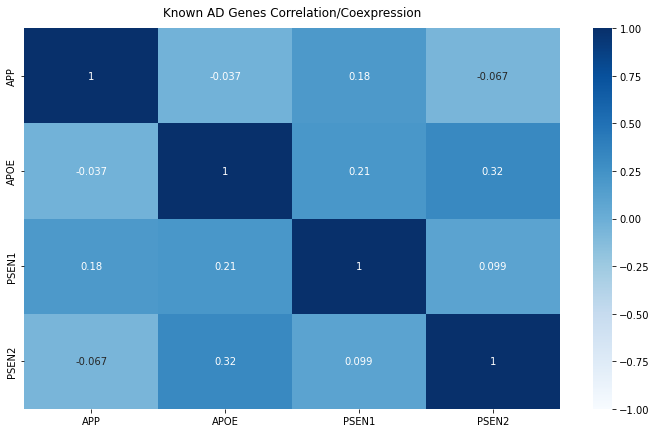

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
new_heat = sns.heatmap(known_matrix, annot=True, vmin=-1, vmax=1, xticklabels=x_axis_labels, yticklabels=x_axis_labels,cmap='Blues');
new_heat.set_title('Known AD Genes Correlation/Coexpression', fontdict={'fontsize':12}, pad=12);